In [33]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
# load data
df = pd.read_excel("Dataset.xlsx")

In [3]:
# remove campaign variables so that response is our only target varaiable
#df = df.drop(columns=["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp6"])

In [4]:
# Complain, Z_CostContact, and Z_Revenue all have the same value for each record. we will remove those as well
df = df.drop(columns=["Complain", "Z_CostContact", "Z_Revenue"])

In [5]:
# Finding the rows with missing values 
i_missing = np.where(df.isna())[0]
df_miss = df.iloc[i_missing, :]
print(df_miss.shape)
display(df_miss)

(24, 27)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,1,7,6,0,0,0,0,0,0,0


In [6]:
#Addign Age column 
df['Age'] =  2022 - df['Year_Birth'] 


#Removing the Year_Birth
df.drop('Year_Birth', axis = 1, inplace = True)
display(df.head())

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,4,7,0,0,0,0,0,1,1,65
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,5,0,0,0,0,0,0,0,68
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,10,4,0,0,0,0,0,0,0,57
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,4,6,0,0,0,0,0,0,0,38
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,6,5,0,0,0,0,0,0,0,41


In [7]:
# We drop the dt_customer as it wont help us anyways. 

df.drop('Dt_Customer', axis = 1, inplace = True)

display(df.head())
display(df.shape)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Response,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,4,7,0,0,0,0,0,1,1,65
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,2,5,0,0,0,0,0,0,0,68
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,10,4,0,0,0,0,0,0,0,57
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,4,6,0,0,0,0,0,0,0,38
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,6,5,0,0,0,0,0,0,0,41


(2240, 26)

In [8]:
# encoding the education 

labels = df['Education'].astype('category').cat.categories.tolist()
edu = {'Education' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(edu)

{'Education': {'2n Cycle': 1, 'Basic': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}}


In [9]:
df.replace(edu, inplace=True)
display(df['Education'].unique())

array([3, 5, 4, 2, 1])

In [10]:
labels = df['Marital_Status'].astype('category').cat.categories.tolist()
print(labels)

['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']


In [11]:
# encoding the Marital_Status

labels = df['Marital_Status'].astype('category').cat.categories.tolist()
ms = {'Marital_Status' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}


#print(ms)

df.replace(ms, inplace=True)
#display(df['Marital_Status'].unique())

In [12]:
#dropping the ID column
df = df.iloc[:,1:]
display(df.head())
display(df.shape)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Response,Age
0,3,5,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,1,65
1,3,5,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,68
2,3,6,71613.0,0,0,26,426,49,127,111,...,10,4,0,0,0,0,0,0,0,57
3,3,6,26646.0,1,0,26,11,4,20,10,...,4,6,0,0,0,0,0,0,0,38
4,5,4,58293.0,1,0,94,173,43,118,46,...,6,5,0,0,0,0,0,0,0,41


(2240, 25)

In [13]:
# we use Knearest neighbour for imputation
from sklearn.impute import KNNImputer

imp = KNNImputer(n_neighbors=5)

df_knn = pd.DataFrame(imp.fit_transform(df))


display(df_knn)


np.any(df_knn.isna())

#to see imputation  - all income values have a valur now
print(f'KNN Imputed rows')
display(df_knn.iloc[i_missing, :])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,76.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,41.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


KNN Imputed rows


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
10,3.0,4.0,28314.4,1.0,0.0,11.0,5.0,5.0,6.0,0.0,...,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0
27,3.0,5.0,20433.0,1.0,0.0,19.0,5.0,1.0,3.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
43,5.0,5.0,41652.8,0.0,0.0,80.0,81.0,11.0,50.0,3.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0
48,3.0,5.0,44081.2,2.0,1.0,96.0,48.0,5.0,48.0,6.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0
58,3.0,5.0,33402.6,1.0,0.0,57.0,11.0,3.0,22.0,2.0,...,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
71,1.0,4.0,31415.4,1.0,0.0,25.0,25.0,3.0,43.0,17.0,...,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
90,5.0,4.0,64301.6,2.0,1.0,4.0,230.0,42.0,192.0,49.0,...,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
91,3.0,5.0,30990.6,1.0,1.0,45.0,7.0,0.0,8.0,2.0,...,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0
92,4.0,6.0,66289.8,0.0,0.0,87.0,445.0,37.0,359.0,98.0,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
128,5.0,4.0,56081.0,0.0,1.0,23.0,352.0,0.0,27.0,10.0,...,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0


In [14]:
# Getting the column names back. 
ls = []
for i in df.columns:
    ls.append(i)
col = {}

#len(ls)
for i in range (0,len(ls)):
        col[i] = ls[i]
        
#print(col)

df_knn = df_knn.rename(columns=col)
#df_knn.head()
df = df_knn
display(df.head())
display(df.shape)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Response,Age
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0


(2240, 25)

In [15]:
# split data into data and target data
X = df.iloc[:, 0:23]

age = df["Age"]
X["Age"] = age

T = df.iloc[:, -2]

/var/folders/n5/cd1ln2js67b7bdpgv6s1k_nw0000gn/T/ipykernel_79065/217387924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = age


In [16]:
T

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2235    0.0
2236    1.0
2237    1.0
2238    0.0
2239    1.0
Name: Response, Length: 2240, dtype: float64

In [17]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Age
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,...,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,...,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,...,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,...,3.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,...,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,76.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,...,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,41.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,...,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0


In [18]:
# remove campaign variables so that response is our only target varaiable
X = X.drop(columns=["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp6"])

In [19]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age
0,3.0,5.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,65.0
1,3.0,5.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,68.0
2,3.0,6.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,57.0
3,3.0,6.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,38.0
4,5.0,4.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3.0,4.0,61223.0,0.0,1.0,46.0,709.0,43.0,182.0,42.0,118.0,247.0,2.0,9.0,3.0,4.0,5.0,55.0
2236,5.0,6.0,64014.0,2.0,1.0,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,76.0
2237,3.0,3.0,56981.0,0.0,0.0,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,41.0
2238,4.0,6.0,69245.0,0.0,1.0,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,66.0


In [20]:
# split data
X_train, X_test, t_train, t_test = train_test_split(X, T, test_size=0.2)

In [21]:
#logistic regression
log = LogisticRegression()
log.fit(X_train, t_train)
pred = log.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {log.score(X_test, t_test)}")
print(f"Train Score: {log.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7901785714285714
Train Score: 0.7779017857142857
Precision Score: 0.6984126984126984
Recall Score: 0.3697478991596639
Balanced Accuracy Score: 0.6559985696406222


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, t_train)
pred = nb.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {nb.score(X_test, t_test)}")
print(f"Train Score: {nb.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7366071428571429
Train Score: 0.7053571428571429
Precision Score: 0.5037593984962406
Recall Score: 0.5630252100840336
Balanced Accuracy Score: 0.6812086536742357


In [23]:
# SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, t_train)
pred = sgd.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {sgd.score(X_test, t_test)}")
print(f"Train Score: {sgd.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7232142857142857
Train Score: 0.6958705357142857
Precision Score: 0.4838709677419355
Recall Score: 0.6302521008403361
Balanced Accuracy Score: 0.693545503307706


In [24]:
# ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, t_train)
pred = ridge.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {ridge.score(X_test, t_test)}")
print(f"Train Score: {ridge.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.796875
Train Score: 0.7868303571428571
Precision Score: 0.71875
Recall Score: 0.3865546218487395
Balanced Accuracy Score: 0.6659216878240658


In [25]:
# svc
svc = SVC(kernel='rbf', tol=1e-3, random_state=0)
svc.fit(X_train, t_train)
pred = svc.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {svc.score(X_test, t_test)}")
print(f"Train Score: {svc.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7745535714285714
Train Score: 0.7633928571428571
Precision Score: 0.875
Recall Score: 0.17647058823529413
Balanced Accuracy Score: 0.5836760236009297


In [26]:
# logistic regression with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LogisticRegression(random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.796875
Train Score: 0.7885044642857143
Precision Score: 0.7121212121212122
Recall Score: 0.3949579831932773
Balanced Accuracy Score: 0.6686036116574289


In [27]:
# naive bayes with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', GaussianNB())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7299107142857143
Train Score: 0.7042410714285714
Precision Score: 0.4925373134328358
Recall Score: 0.5546218487394958
Balanced Accuracy Score: 0.6739674593241551


In [28]:
# sgd with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SGDClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.7857142857142857
Train Score: 0.7767857142857143
Precision Score: 0.6074766355140186
Recall Score: 0.5462184873949579
Balanced Accuracy Score: 0.7092794564634364


In [29]:
# ridge with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', RidgeClassifier())])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.796875
Train Score: 0.7868303571428571
Precision Score: 0.71875
Recall Score: 0.3865546218487395
Balanced Accuracy Score: 0.6659216878240658


In [30]:
# svc with standard scaler
clf = Pipeline([('scaler', StandardScaler()), 
                ('classifier', SVC(kernel='rbf', tol=1e-3, random_state=0))])
clf.fit(X_train, t_train)
pred = clf.predict(X_test)
precision = precision_score(t_test, pred)
recall = recall_score(t_test, pred)
print(f"Test Score: {clf.score(X_test, t_test)}")
print(f"Train Score: {clf.score(X_train, t_train)}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"Balanced Accuracy Score: {balanced_accuracy_score(t_test, pred)}")

Test Score: 0.8169642857142857
Train Score: 0.84375
Precision Score: 0.7761194029850746
Recall Score: 0.4369747899159664
Balanced Accuracy Score: 0.6956910423743965


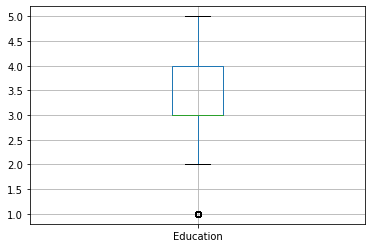

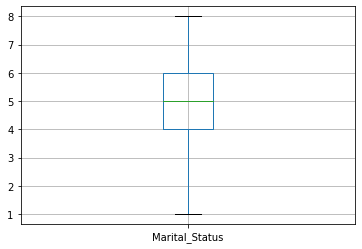

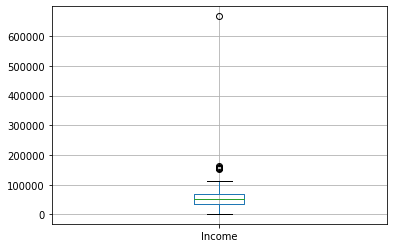

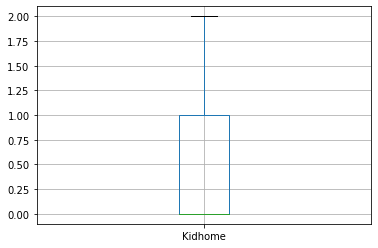

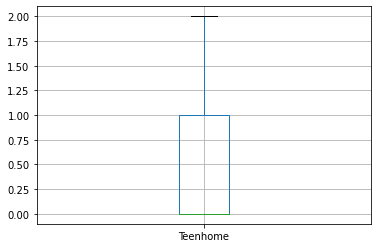

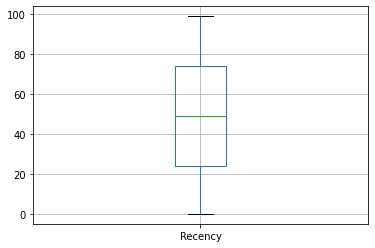

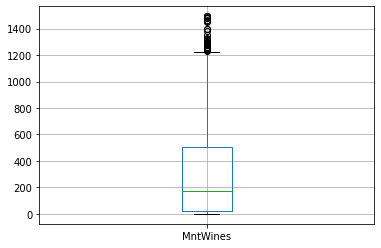

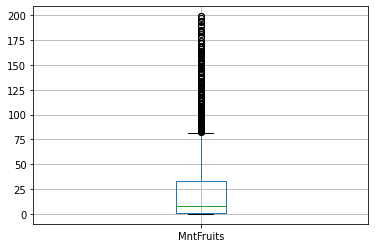

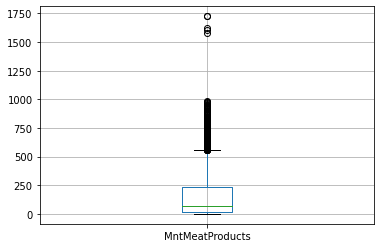

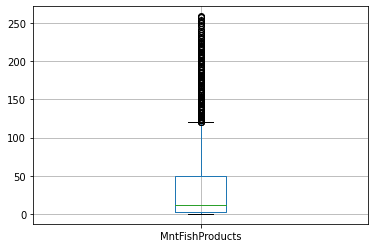

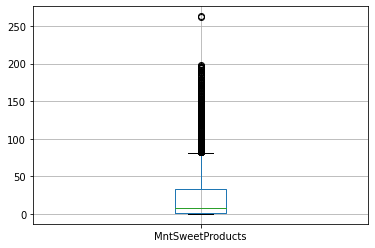

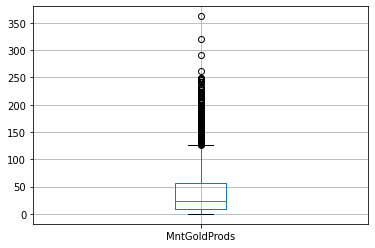

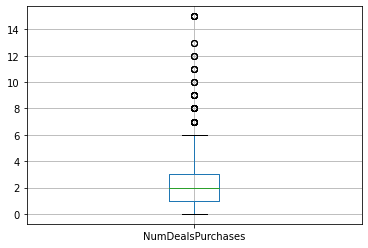

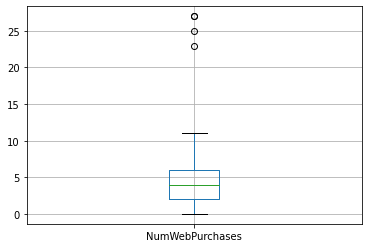

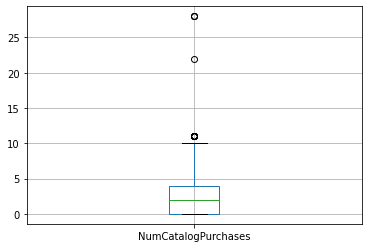

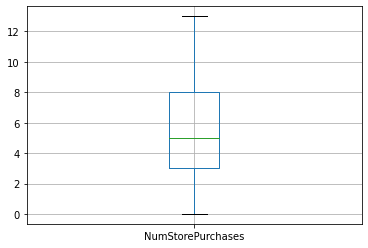

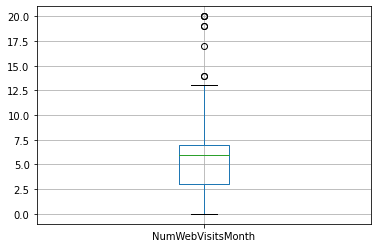

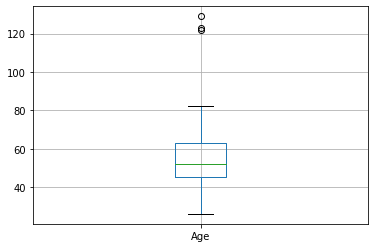

In [31]:
for x in X.columns:
    plt.figure()
    X.boxplot(column=x)

In [32]:
X.dtypes

Education              float64
Marital_Status         float64
Income                 float64
Kidhome                float64
Teenhome               float64
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
Age                    float64
dtype: object